###### Классификация методом k-ближайших соседей

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Функция для разделения линией на диаграмме рассеяния разных групп значений, полученных в результате классификации 

In [2]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


Загружаем встроенный датасет, состоящий их двух разнородных типов данных

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


Text(0, 0.5, 'second feature')

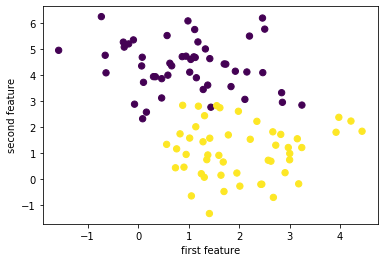

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

Делим датасет на две выборки: обучающую и тестовую

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [6]:
X_train.shape


(50, 2)

In [7]:
y_train.shape

(50,)

Загружаем модуль классификатока методом к-ближайших соседей

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

Проводим классификацию и отображаем результаты с помощью функции plot_2d_separator


In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

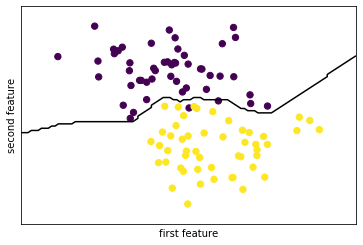

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)

Определим точность предсказаний для набора данных

In [12]:
knn.score(X_test, y_test)

0.96